# Image Deskewing

Importing Required Libraries

In [ ]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import rotate

from deskew import determine_skew



In [ ]:
image = io.imread('MK.jpg')
grayscale = rgb2gray(image)

#Getting skew angle
angle = determine_skew(grayscale)

#Rotating the img using the skew angle
rotated = rotate(image, angle, resize=True) * 255
io.imsave('output.png', rotated.astype(np.uint8))

Model building

# KNN

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [ ]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

#predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.2537688442211055

Using KNN we are getting an accuracy of 25%


# Random Forest Classifier 

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)



In [51]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)

acc_RF

0.4966442953020134

Using Random Forest we are getting an accuracy of 49.6%.

In [ ]:
#Dataset for Neural Network

In [14]:
size=224
class Dataset:
    def __init__(self):
        self.x_path =  r'C:\Users\vikra\OneDrive\Documents\AI Notes\comptr vision\project1\train'
        self.classes = os.listdir(self.x_path)
        self.x_data = []
        self.y_data = []
        
    def __preprocessImage(self, image):
        image = np.array(image, dtype = "float32")
        image = cv2.resize(image, (size, size))
        image = np.reshape(image, (size, size, 3)) 
        image /= 255.0
        
        return np.array(image, dtype = "float32")
    
    def __extractImages(self, path):
        images = os.listdir(path)
        for image_path in images:
            image = cv2.imread(path + "/" + image_path)
            self.x_data.append(self.__preprocessImage(image))
            self.y_data.append(self.classes.index(path.split("/")[-1]))
    def load_data(self):
        i = 0
        for index in self.classes:
            i += 1
            self.__extractImages(self.x_path + "/" + index)   #\train\1'
            print(f"{(i / len(self.classes)) * 100}% Data Loaded, Index = {i}", end = "\r")
        
        #self.x_data = np.reshape(self.x_data, (np.shape(self.x_data)[0], 1, size, size, 3))
        self.x_data = np.array(self.x_data, dtype = "float32")
        self.y_data = to_categorical(self.y_data)
        self.y_data = np.array(self.y_data, dtype = "float32")
        
        print("Data Successfully Loaded")
        return train_test_split(self.x_data, self.y_data, random_state = 42)
    
dataset = Dataset()
x_train, x_test, y_train, y_test = dataset.load_data()
#y_train = tf.constant(y_train)
#y_test = tf.constant(y_test)

#del dataset
#gc.collect()
            

Data Successfully Loadedx = 12, Index = 11


In [15]:
print(y_train.shape)
print(x_train.shape)

(3575, 12)
(3575, 224, 224, 3)


In [16]:
print("X_train shape:", x_train.shape)
print("Images in X_train:", x_train.shape[0])
print("Images in X_test:", x_test.shape[0])
print("Max value in X_train:", x_train.max())
print("Min value in X_train:", x_train.min())


X_train shape: (3575, 224, 224, 3)
Images in X_train: 3575
Images in X_test: 1192
Max value in X_train: 1.0
Min value in X_train: 0.0


In [17]:
from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)

print("One value of y_train:", y_train[0])

Shape of y_train: (3575, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [18]:
x_train

array([[[[0.25846463, 0.36763832, 0.43251553],
         [0.183142  , 0.28381976, 0.3866909 ],
         [0.16636029, 0.2703356 , 0.3853379 ],
         ...,
         [0.19678871, 0.20842962, 0.2370173 ],
         [0.17604917, 0.16960658, 0.22261779],
         [0.18250799, 0.18366721, 0.22172369]],

        [[0.2143545 , 0.30048895, 0.37012053],
         [0.15266606, 0.22023934, 0.32206008],
         [0.19703756, 0.3220163 , 0.413753  ],
         ...,
         [0.16366798, 0.1711397 , 0.20251225],
         [0.1747199 , 0.17569903, 0.21295643],
         [0.1729992 , 0.17159864, 0.21506226]],

        [[0.22951931, 0.27201006, 0.31892884],
         [0.11264756, 0.1553859 , 0.21549745],
         [0.08398859, 0.14519307, 0.23715112],
         ...,
         [0.22132729, 0.2263918 , 0.259924  ],
         [0.18583934, 0.19405387, 0.20506953],
         [0.19609469, 0.18497649, 0.22696078]],

        ...,

        [[0.7129552 , 0.6862745 , 0.6594538 ],
         [0.7226341 , 0.6920318 , 0.6688738 ]

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense


## Neural Network 1

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model0 = Sequential()
model0.add(Flatten())
model0.add(Dense(128, activation="relu"))
model0.add(Dense(12, activation="softmax"))

In [15]:
# Compile the model
model0.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model0.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

NameError: name 'x_train' is not defined

In [14]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
model0.evaluate(x_test, y_test)

38/38 [==============================] - 1s 32ms/step - loss: 2.4270 - accuracy: 0.1482


[2.4269967079162598, 0.14824120700359344]

#Basic NN is giving very less accuracy of 0.14%

In [5]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
#from tensorflow.keras.layers import backend as k

In [6]:
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization

## Neural Network 2

#Adding more layers and batch normalization

In [7]:
model = Sequential()

In [8]:
#### Adding Batch normalization layer 

#Hidden Layer 1
model.add(Flatten())
model.add(Dense(512, kernel_initializer='he_normal'))#,input_shape = (1024, )))
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 2

model.add(Dense(256, kernel_initializer='he_normal'))
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 3

model.add(Dense(128, kernel_initializer='he_normal'))
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))

#Hidden Layer 4
#Adding third Hidden layer
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(BatchNormalization())

model.add(Activation('relu'))

#Hidden Layer 5

model.add(Dense(32, kernel_initializer='he_normal'))
model.add(BatchNormalization())
#Adding Activation function
model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
model.add(Dense(12))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
model.add(Activation('softmax'))

In [9]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

# Fit the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Train on 3575 samples, validate on 1192 samples
Epoch 1/10
3575/3575 [==============================] - 6s 2ms/sample - loss: 2.3561 - accuracy: 0.2006 - val_loss: 2.4596 - val_accuracy: 0.1451
Epoch 2/10
3575/3575 [==============================] - 4s 1ms/sample - loss: 1.8206 - accuracy: 0.4439 - val_loss: 2.4172 - val_accuracy: 0.2366
Epoch 3/10
3575/3575 [==============================] - 4s 1ms/sample - loss: 1.4665 - accuracy: 0.5866 - val_loss: 3.0528 - val_accuracy: 0.1602
Epoch 4/10
3575/3575 [==============================] - 4s 1ms/sample - loss: 1.2088 - accuracy: 0.6848 - val_loss: 2.4870 - val_accuracy: 0.2273
Epoch 5/10
3575/3575 [==============================] - 4s 1ms/sample - loss: 0.9949 - accuracy: 0.7583 - val_loss: 2.2937 - val_accuracy: 0.3104
Epoch 6/10
3575/3575 [==============================] - 4s 1ms/sample - loss: 0.8086 - accuracy: 0.8227 - val_loss: 2.1652 - val_accuracy: 0.3398
Epoch 7/10
3575/3575 [==============================] - 4s 1ms/sample - loss

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  77070848  
_________________________________________________________________
batch_normalization (BatchNo multiple                  2048      
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  131328    
_________________________________________________________________
batch_normalization_1 (Batch multiple                  1024      
_________________________________________________________________
activation_1 (Activation)    multiple                  0

In [11]:
results_1 = model.evaluate(x_test, y_test)
print('Val_acc using Batch  : ', results_1[1])

1192/1192 [==============================] - 1s 447us/sample - loss: 2.1971 - accuracy: 0.3104
Val_acc using Batch  :  0.3104027


Adding more layers and with batch normalization accuracy has increased to 31%

In [ ]:
model.history

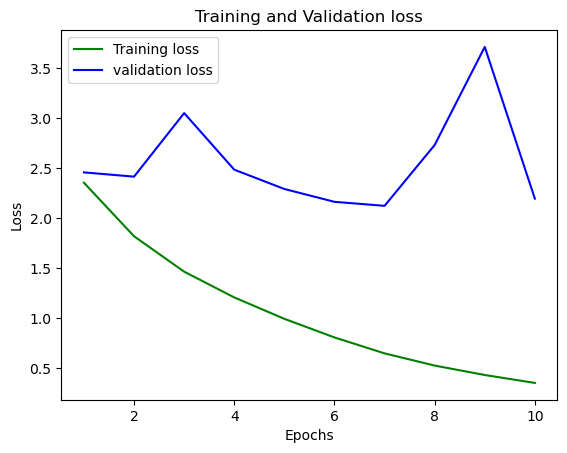

In [12]:
loss_train = model.history.history['loss']
loss_val = model.history.history['val_loss']
epochs = range(1,10+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

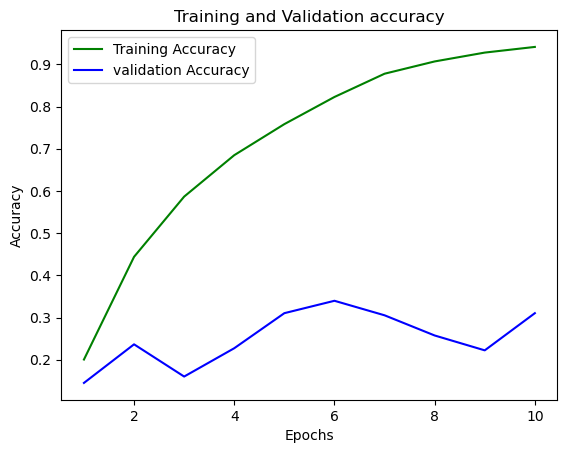

In [13]:
accuracy_train = model.history.history['accuracy']
accuracy_val = model.history.history['val_accuracy']
epochs = range(1,10+1)
plt.plot(epochs, accuracy_train, 'g', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#  model is overfitting

## Convolutional Neural Network

In [10]:
from tensorflow.keras.layers import Conv2D

modelx = Sequential()
modelx.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224, 224, 3)))
modelx.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
modelx.add(Flatten())
modelx.add(Dense(128, activation="relu"))
modelx.add(Dense(12, activation="softmax"))

In [11]:
# Compile the model
modelx.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
modelx.fit( x=x_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)

Epoch 1/10
79/79 [==============================] - 467s 6s/step - loss: 6.3738 - accuracy: 0.1189 - val_loss: 2.4745 - val_accuracy: 0.1312
Epoch 2/10
79/79 [==============================] - 465s 6s/step - loss: 2.3541 - accuracy: 0.2123 - val_loss: 2.4418 - val_accuracy: 0.1823
Epoch 3/10
79/79 [==============================] - 462s 6s/step - loss: 1.5447 - accuracy: 0.5227 - val_loss: 2.0209 - val_accuracy: 0.3526
Epoch 4/10
79/79 [==============================] - 470s 6s/step - loss: 0.5449 - accuracy: 0.8484 - val_loss: 2.5259 - val_accuracy: 0.3312
Epoch 5/10
79/79 [==============================] - 468s 6s/step - loss: 0.2211 - accuracy: 0.9461 - val_loss: 3.0646 - val_accuracy: 0.3219
Epoch 6/10
79/79 [==============================] - 465s 6s/step - loss: 0.0568 - accuracy: 0.9872 - val_loss: 2.7657 - val_accuracy: 0.3674
Epoch 7/10
79/79 [==============================] - 471s 6s/step - loss: 0.0224 - accuracy: 0.9964 - val_loss: 3.3780 - val_accuracy: 0.3805
Epoch 8/10
79

In [12]:
resultsx = modelx.evaluate(x_test, y_test)
print('Accuracy : ', resultsx[1])

38/38 [==============================] - 40s 1s/step - loss: 3.3413 - accuracy: 0.4146
Accuracy :  0.4145728647708893


We are getting an accuracy of 41.4% using CNN.

In [16]:
modelx.save("modelx.h5")

In [48]:
def __preprocessImage(image):
    image = np.array(image, dtype = "float32")
    image = cv2.resize(image, (size, size))
    image = np.reshape(image, (size, size, 3)) 
    image /= 255.0
    
    return np.array(image, dtype = "float32")

x_data_test = []
    
def __extractImages(path):
    global x_data_test
    image = cv2.imread(path)
    x_data_test.append(__preprocessImage(image))

x_path = "/content/drive/MyDrive/Seedling - Prediction"
images = os.listdir(x_path)

for image in images:
    __extractImages(x_path + "/" + image)
x_data_test = np.array(x_data_test, dtype = "float32")

## Prediction using CNN

In [49]:
modelx.predict(x_data_test)

array([[6.3027302e-04, 3.8484428e-05, 1.9094204e-09, 1.2237376e-07,
        5.3807680e-06, 3.6950618e-01, 6.2661982e-01, 5.6537317e-07,
        2.0892365e-04, 2.9900642e-03, 2.5007137e-07, 7.9259523e-11]],
      dtype=float32)

In [50]:
pred=modelx.predict(x_data_test)

In [51]:
np.argmax(pred)

6

In [52]:
classes = os.listdir("/content/drive/MyDrive/train")
classes

['Shepherds Purse',
 'Maize',
 'Loose Silky-bent',
 'Sugar beet',
 'Small-flowered Cranesbill',
 'Fat Hen',
 'Common Chickweed',
 'Cleavers',
 'Common wheat',
 'Scentless Mayweed',
 'Charlock',
 'Black-grass']

In [54]:
classes[np.argmax(pred)]

'Common Chickweed'

Best accuracy has been achieved using Random forest.
Lets see prediction using Random Forest

## Prediction using Random Forest

In [52]:
def __preprocessImage(image):
    image = np.array(image, dtype = "float32")
    image = cv2.resize(image, (size, size))
    image = np.reshape(image, (size, size, 3)) 
    image /= 255.0
    
    return np.array(image, dtype = "float32")

x_data_test = []
    
def __extractImages(path):
    global x_data_test
    image = cv2.imread(path)
    x_data_test.append(__preprocessImage(image))

x_path = r"C:\Users\vikra\OneDrive\Documents\AI Notes\comptr vision\project1\Seedling - Prediction"
images = os.listdir(x_path)

for image in images:
    __extractImages(x_path + "/" + image)
x_data_test = np.array(x_data_test, dtype = "float32")

In [54]:
#Reshape data from 2D to 1D -> 32X32 to 1024
x_data_test = np.asarray(x_data_test).reshape(x_data_test.shape[0],224*224*3)

In [56]:
pred=rfcl.predict(x_data_test)


In [57]:
pred

array([7], dtype=int64)

In [61]:
classes = os.listdir(r"C:\Users\vikra\OneDrive\Documents\AI Notes\comptr vision\project1\train")
classes[7]

'Maize'

# Conclusion

Using KNN we are getting an accuracy of 25%

Using Random Forest we are getting an accuracy of 49.6%.
CNN with batch normalization is giving accuracy of 31%.

We are getting an accuracy of 41.4% using CNN.

CNN has predicted the prediction image as 'Common Chickweed'

Best accuracy has been achieved using CNN.

In images dataset CNN performs best among supervised ML algorithms and neural networks.

Feature engineering is not required in CNN. It saves a lot of calculation in the dense layer. This way it ensures higher accuracy. 

Random forest has predicted the prediction image as 'Maize'